<center>
    
<h2>ĐỒ ÁN CHUYÊN NGÀNH KHOA HỌC MÁY TÍNH </h2>
    
</center>
 
---
**Thông tin sinh viên:**
1. Họ tên SV: Nguyễn Văn Kha 
2. Mã Sinh viên:2121051423
3. Lớp DCCTCT66_07B
---

**Mô tả tập dữ liệu:**

Tập dữ liệu Data_Diabetes.csv bao gồm kết quả xét nghiệm bệnh tiểu đường của 723 bệnh nhân:

Mỗi bản ghi tương ứng với một bệnh nhân, bao gồm 8 thuộc tính:

1.	Gender : Male, Female

2.	Glucose: Chỉ số Gluco

3.	BloodPressur: Huyết áp (đơn vị: mm Hg)

4.	SkinThickness: Mức độ dày da (đơn vị: mm)

5.	Insulin: Chỉ số Insulin (đơn vị: mu U/ml)

6.	BMI: Chỉ số BMI của cơ thể (được tính bằng = Cân nặng / chiều cao2)

7.	Age: Tuổi

8.	Outcome: Thuộc tính cho biết bệnh nhân có mắc bệnh tiểu đường hay không? Không bị tiểu đường (0) – Bị tiểu đường (1)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import tree  
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## 1 . Đọc tập dữ liệu

In [2]:
#Đọc tập dữ liệu dataset
df_diabetes = pd.read_csv('Data_Diabetes.csv')
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         723 non-null    object 
 1   Glucose        723 non-null    int64  
 2   BloodPressure  723 non-null    int64  
 3   SkinThickness  723 non-null    float64
 4   Insulin        723 non-null    float64
 5   BMI            723 non-null    float64
 6   Age            723 non-null    int64  
 7   Outcome        723 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 45.3+ KB


In [3]:
# Hiển thị 5 dòng đầu tiên 
df_diabetes.head()

,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,Male,148,72,35.0,126.0,33.6,50,1
1,Female,85,66,29.0,126.0,26.6,31,0
2,Male,183,64,29.0,126.0,23.3,32,1
3,Female,89,66,23.0,94.0,28.1,21,0
4,Male,137,40,35.0,168.0,43.1,33,1


In [4]:
# Hiển thị 5 dòng cuối
df_diabetes.tail()

,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
718,Male,101,76,48.0,180.0,32.9,63,0
719,Male,122,70,27.0,126.0,36.8,27,0
720,Female,121,72,23.0,112.0,26.2,30,0
721,Female,126,60,29.0,126.0,30.1,47,1
722,Female,93,70,31.0,126.0,30.4,23,0


In [5]:
# Hiển thị 5 dòng ngẫu nhiên 
df_diabetes.sample(5)

,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
255,Male,108,62,32.0,56.0,25.2,21,0
40,Female,171,110,24.0,240.0,45.4,54,1
114,Male,107,74,30.0,100.0,33.6,23,0
240,Male,86,68,32.0,126.0,35.8,25,0
234,Male,165,90,33.0,680.0,52.3,23,0


In [6]:
# Quan sát thuộc tính bất thường :
df_diabetes.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,121.928077,72.467497,29.147994,142.435685,32.473582,33.367911,0.344398
std,30.746940,12.256605,9.017616,88.624795,6.891518,11.764549,0.475501
min,44.000000,30.000000,7.000000,14.000000,18.200000,21.000000,0.000000
25%,100.000000,64.000000,25.000000,119.500000,27.500000,24.000000,0.000000
50%,117.000000,72.000000,29.000000,126.000000,32.400000,29.000000,0.000000
75%,142.000000,80.000000,33.000000,131.000000,36.600000,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000,1.000000


#### Không có thuộc tính nào bất thường

## 2. Tiền xử lý dữ liệu

In [7]:
# Kiểm tra giá trị thiếu
print("\nSố lượng giá trị thiếu trong mỗi cột:")
print(df_diabetes.isnull().sum())


Số lượng giá trị thiếu trong mỗi cột:
Gender           0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64


In [8]:
# Kiểm tra các giá trị trùng lặp 
print("\nSố lượng hàng trùng lặp:", df_diabetes.duplicated().sum())


Số lượng hàng trùng lặp: 0


In [9]:
# Chuyển cột "Gender" thành số: Male(1) - Female (0)
df_diabetes["Gender"] = df_diabetes["Gender"].str.lower()  
df_diabetes["Gender"] = (df_diabetes["Gender"] == "male").astype(int)

print(df_diabetes.head())

   Gender  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age  Outcome
0       1      148             72           35.0    126.0  33.6   50        1
1       0       85             66           29.0    126.0  26.6   31        0
2       1      183             64           29.0    126.0  23.3   32        1
3       0       89             66           23.0     94.0  28.1   21        0
4       1      137             40           35.0    168.0  43.1   33        1


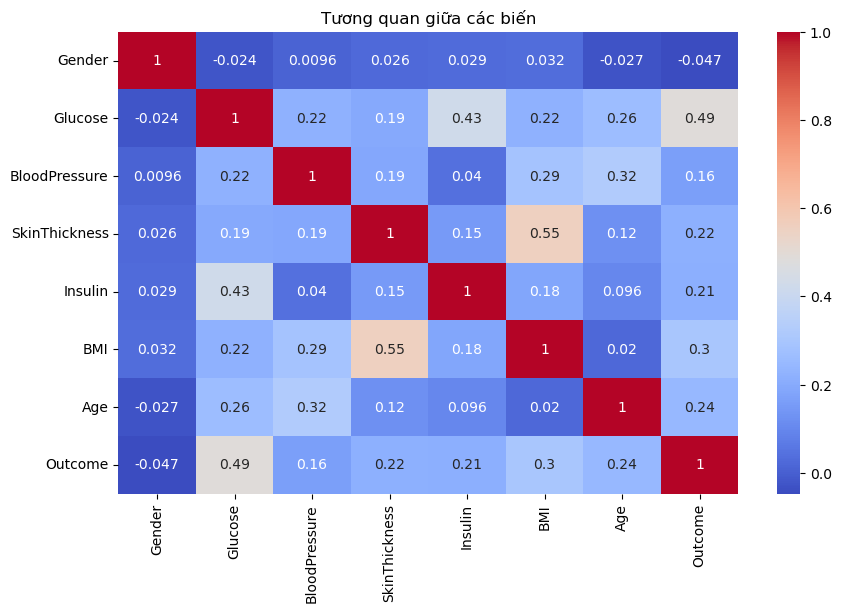

In [10]:
# Trực quan hóa dữ liệu :
plt.figure(figsize=(10,6))
sns.heatmap(df_diabetes.corr(), annot=True, cmap='coolwarm')
plt.title("Tương quan giữa các biến")
plt.show()

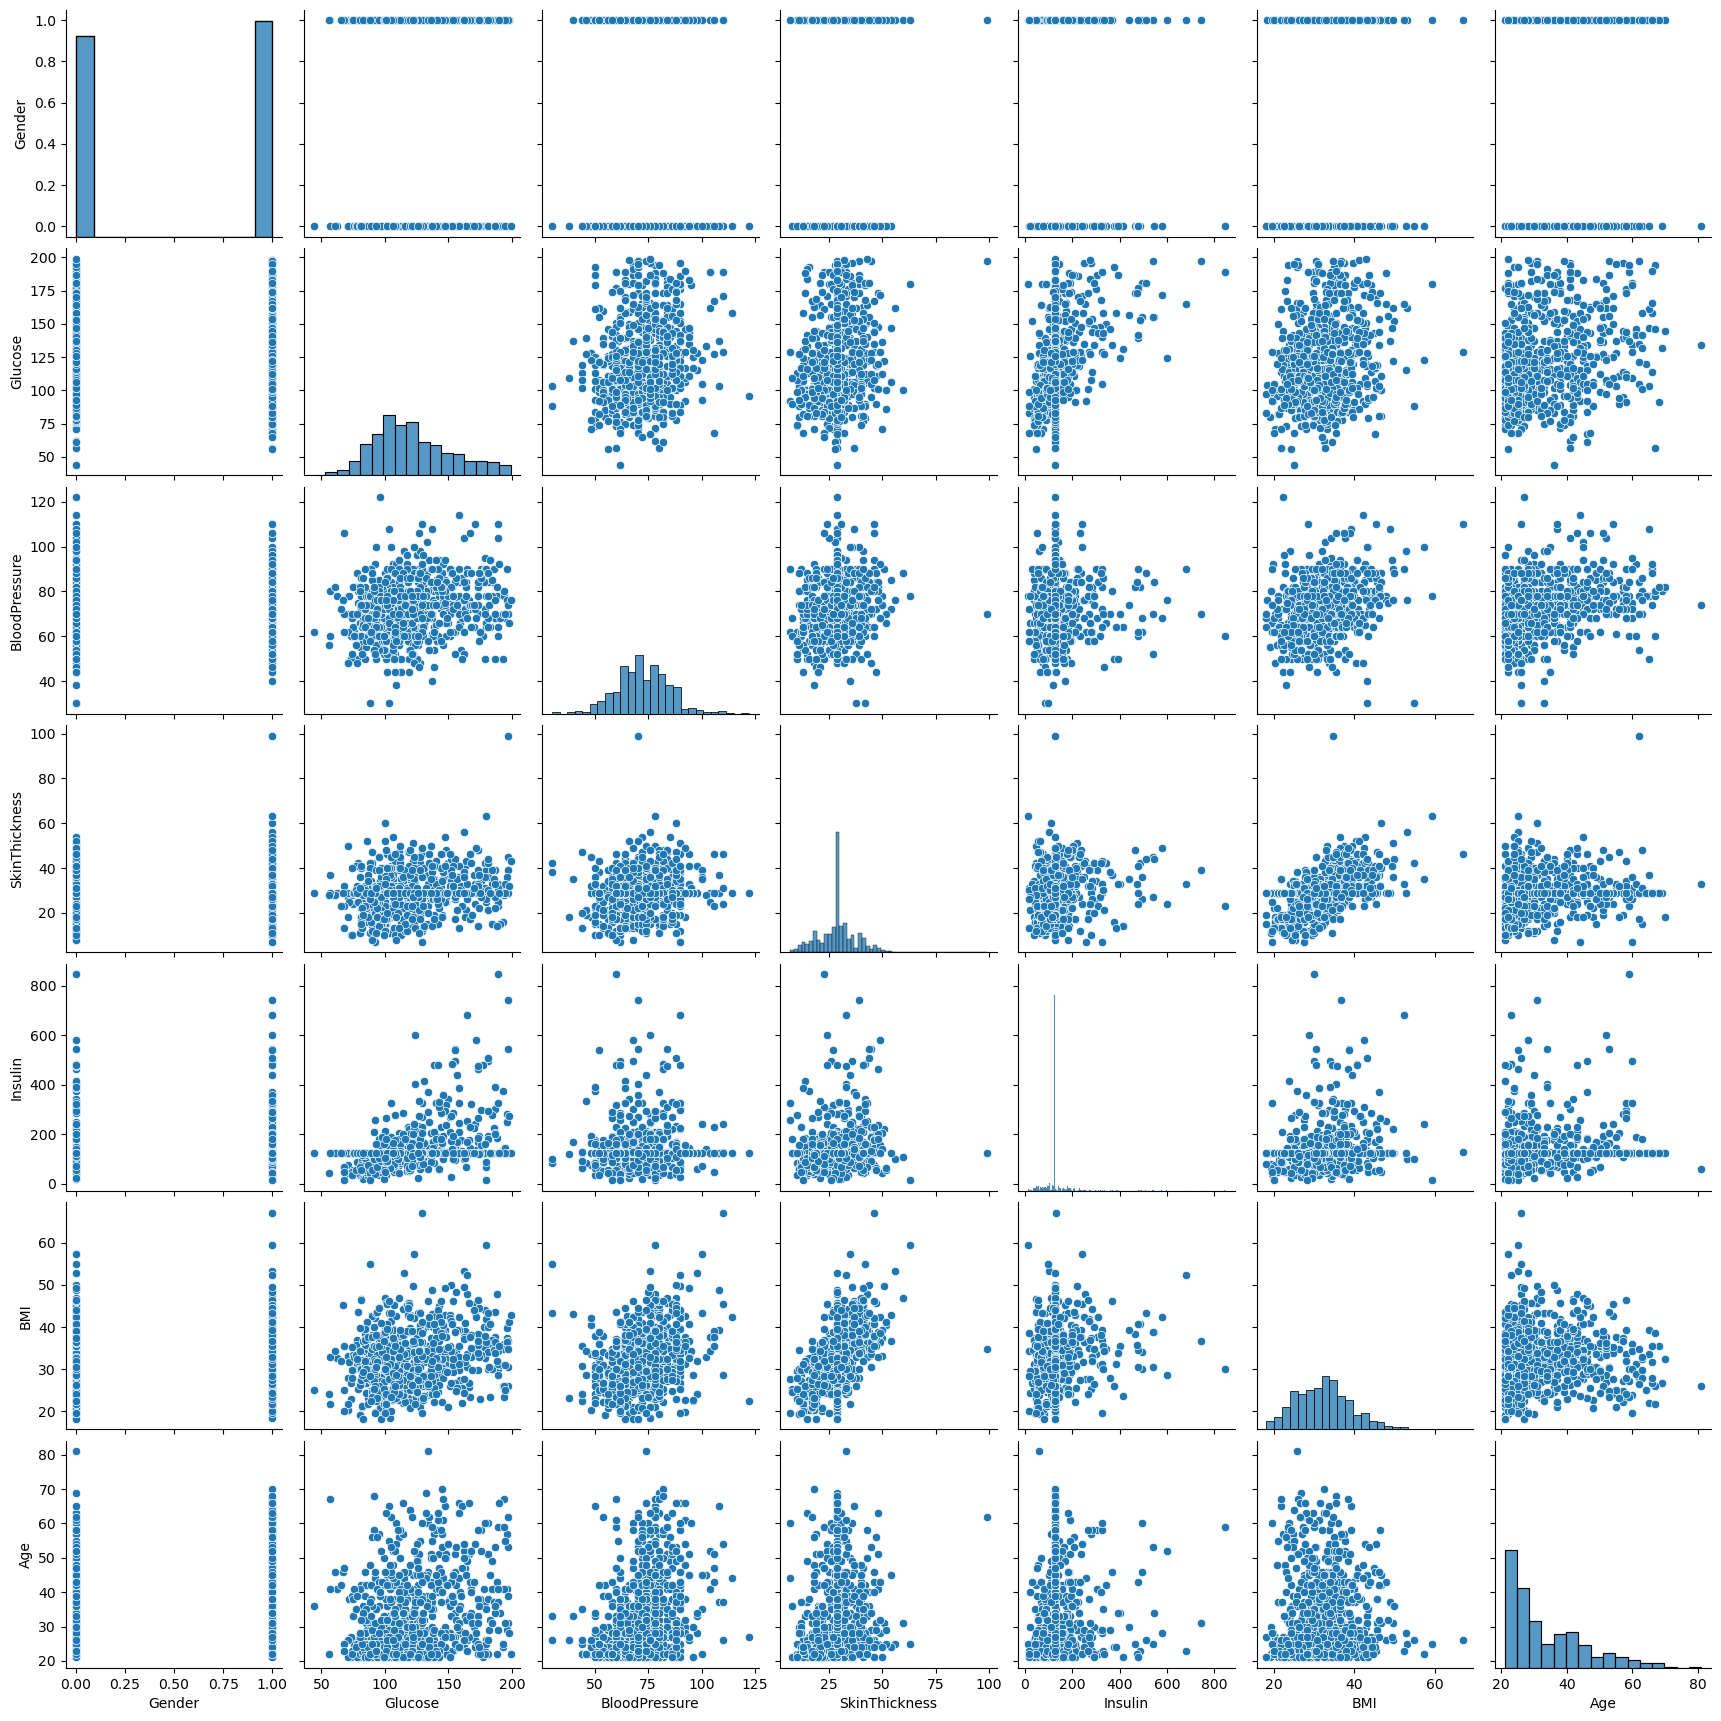

In [11]:
# Biểu đồ tán xạ của các đặc trưng
sns.pairplot(df_diabetes.iloc[:, :-1], diag_kind='hist')

# Hiển thị biểu đồ
plt.show()

In [12]:
# Tìm hiểu thuộc tính về biến Y : (Out come)
df_diabetes['Outcome'].unique()

array([1, 0], dtype=int64)

In [13]:
# Thống kê số lượng của từng người
df_diabetes['Outcome'].value_counts()

print (df_diabetes)

     Gender  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age  \
0         1      148             72           35.0    126.0  33.6   50   
1         0       85             66           29.0    126.0  26.6   31   
2         1      183             64           29.0    126.0  23.3   32   
3         0       89             66           23.0     94.0  28.1   21   
4         1      137             40           35.0    168.0  43.1   33   
..      ...      ...            ...            ...      ...   ...  ...   
718       1      101             76           48.0    180.0  32.9   63   
719       1      122             70           27.0    126.0  36.8   27   
720       0      121             72           23.0    112.0  26.2   30   
721       0      126             60           29.0    126.0  30.1   47   
722       0       93             70           31.0    126.0  30.4   23   

     Outcome  
0          1  
1          0  
2          1  
3          0  
4          1  
..       ...  
718   

In [14]:
# Kiểm tra cân bằng dữ liệu:
check_y = df_diabetes['Outcome'].value_counts()  
label_x = ['0: không bị bệnh tiểu đường', '1: bị bệnh tiểu đường']
print(check_y)

0    474
1    249
Name: Outcome, dtype: int64


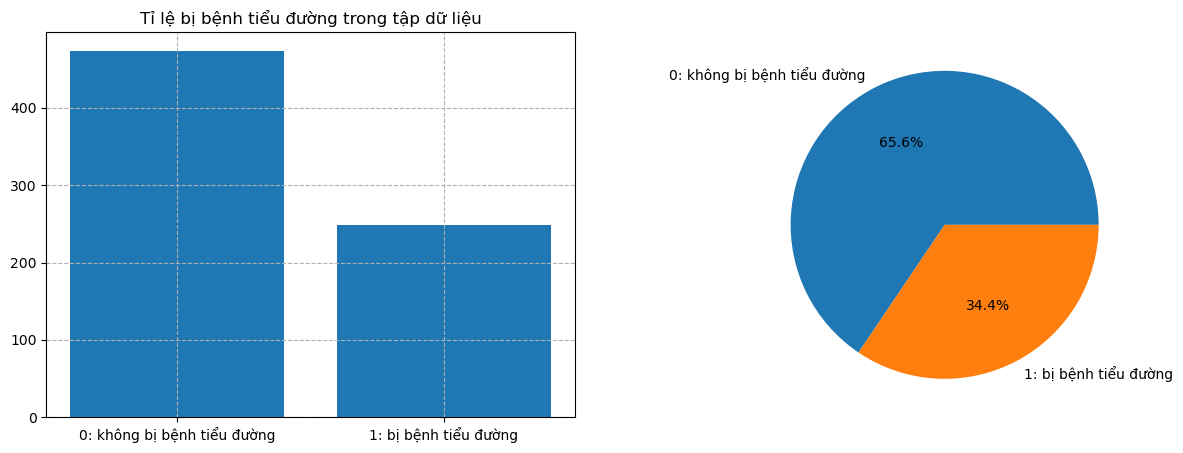

In [15]:
# Vẽ biểu đồ thể hiện số lượng theo từng lớp:
plt.figure(figsize=(15, 5))

# Biểu đồ cột
plt.subplot(1, 2, 1)
plt.bar(label_x, check_y.values)
plt.grid(ls='--') 
plt.title("Tỉ lệ bị bệnh tiểu đường trong tập dữ liệu")

# Vẽ biểu đồ tròn
plt.subplot(1, 2, 2)
plt.pie(check_y.values,
        labels=label_x,
        autopct='%.1f%%')

# Hiển thị biểu đồ:
plt.show()

#### Phân tách biến đầu vào: X - Biến phụ thuộc : Y

In [16]:
df_diabetes.head()

,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,1,148,72,35.0,126.0,33.6,50,1
1,0,85,66,29.0,126.0,26.6,31,0
2,1,183,64,29.0,126.0,23.3,32,1
3,0,89,66,23.0,94.0,28.1,21,0
4,1,137,40,35.0,168.0,43.1,33,1


In [17]:
df_diabetes.columns

Index(['Gender', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'Age', 'Outcome'],
      dtype='object')

In [18]:
# Biến độc lập X
X = df_diabetes[['Gender', 'Glucose', 'BloodPressure',
                 'SkinThickness', 'Insulin', 'BMI', 'Age']]
X.head() 

,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,1,148,72,35.0,126.0,33.6,50
1,0,85,66,29.0,126.0,26.6,31
2,1,183,64,29.0,126.0,23.3,32
3,0,89,66,23.0,94.0,28.1,21
4,1,137,40,35.0,168.0,43.1,33


In [19]:
# Biến phụ thuộc Y
y = df_diabetes[['Outcome']]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


#### Tách tập dữ liệu ra tập Training - Test:

In [20]:
# Phân chia tập dữ liệu :
X = df_diabetes[['Gender', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']]
y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Số lượng ban đầu:', len(y))
print('Số lượng mẫu tập train:', len(y_train))
print('Số lượng mẫu tập test:', len(y_test))

Số lượng ban đầu: 723
Số lượng mẫu tập train: 578
Số lượng mẫu tập test: 145


In [21]:
# Chuẩn hóa dữ liệu :
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

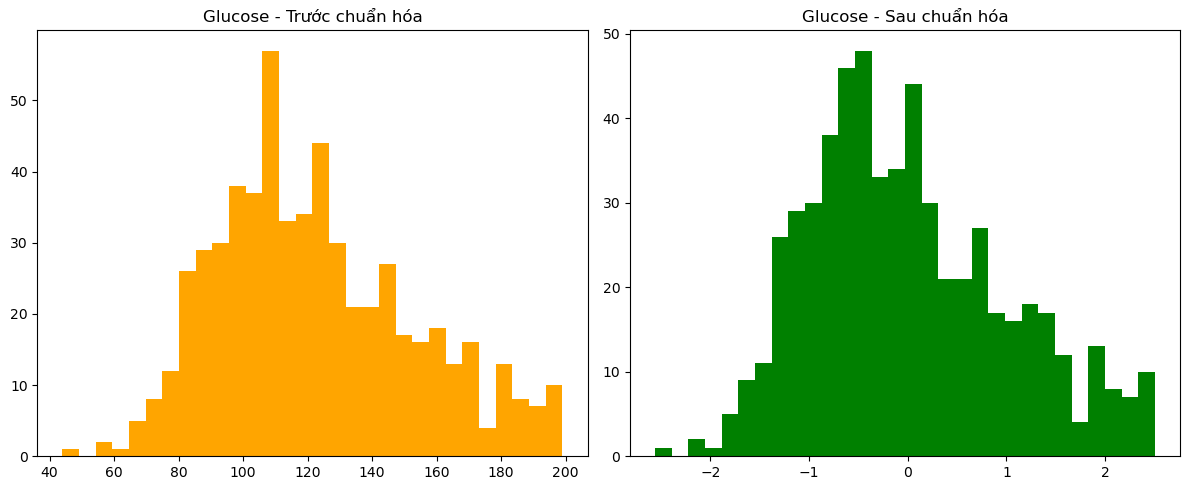

In [22]:
plt.figure(figsize=(12,5))

# Glucose trước chuẩn hóa
plt.subplot(1,2,1)
plt.hist(X_train['Glucose'], bins=30, color='orange')  
plt.title("Glucose - Trước chuẩn hóa")

# Glucose sau chuẩn hóa
plt.subplot(1,2,2)
plt.hist(X_train_scaled[:, 1], bins=30, color='green')
plt.title("Glucose - Sau chuẩn hóa")

plt.tight_layout()
plt.show()

## 3. Huấn luyện mô hình

###  3.1. Sử dụng thuật toán KNN để phân lớp và xây dựng mô hình 

#### Sử dụng thuật toán KNN cho bài toán 

In [23]:
#Gọi thư viện sklearn với thuật toán phân lớp KNN
from sklearn.neighbors import KNeighborsClassifier

#Khai báo model KNN sử dụng các tham số mặc định
KNN_Diabetes = KNeighborsClassifier()


#Hiển thị danh sách tham số: Model.get_params()
KNN_Diabetes.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### Một số tham số quan trọng của thuật toán KNN trong thư viện sklearn:
Tham khảo KNN của thư viện sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


1. n_neighbors: số điểm lân cận sử dụng (default = 5)
2. weights: có tính trọng số của các điểm lân cận hay không?
    * uniform: Tất cả các điểm lân cận đều có trọng số như nhau (default)
    * distance: Các điểm lân cận gần hơn sẽ được đánh trọng số cao hơn
3. algorithm: Thuật toán sử dụng để tính các điểm lân cận: ball_tree, kd_tree, brute, auto (default)
4. p: xác định khoảng cách tính theo manhattan (p=1) hay tính theo euclidean (p=2 default)

#### Huấn luyện mô hình
---
Sử dụng tập dữ liệu Training set để huấn luyện mô hình

In [24]:
#Thực hiện huấn luyện với dữ liệu tập train: Model.fit(X_train,y_train)
KNN_Diabetes.fit(X_train, y_train)

KNeighborsClassifier()

#Độ chính xác của Model trên tập Huấn luyện: Model.score(X_train,y_train)
acc_train = KNN_Diabetes.score(X_train, y_train)
print('Độ chính xác của mô hình trên tập Train:', acc_train)

In [25]:
# Hiển thị dữ liệu X Test:
X_test.head()

,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
336,0,196,76,36.0,249.0,36.5,29
517,1,114,88,29.0,126.0,27.8,66
598,0,97,76,32.0,91.0,40.9,32
33,0,138,76,29.0,126.0,33.2,35
439,1,97,64,36.0,100.0,36.8,25


In [26]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test: Model.predict(X_test)
y_pred_knn = KNN_Diabetes.predict(X_test)
print(y_pred_knn)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1
 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]


In [27]:
#So sánh kết quả dự đoán với kết quả thật với 20 bệnh nhân đầu tiên:
len(y_test)

145

In [28]:
#.Đếm tổng số mẫu dự đoán đúng trên tập Test: normalize=False
acc_number_test = accuracy_score(y_test, y_pred_knn, normalize=False)  
print('Tổng số mẫu dự đoán đúng:', acc_number_test, '/', len(y_test))

Tổng số mẫu dự đoán đúng: 105.0 / 145


In [29]:
#.Độ chính xác (Accuracy) theo tỷ lệ % 
#(số mẫu dự đoán đúng/tổng số mẫu của tập test): normalize=True
acc_test =  accuracy_score(y_test,y_pred_knn, normalize=True)
print('Độ chính xác trên tập test:', acc_test)

Độ chính xác trên tập test: 0.7241379310344828


In [30]:
# Các chỉ số khác:
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"Precision (KNN): {precision_knn:.4f}")
print(f"Recall (KNN): {recall_knn:.4f}")
print(f"F1-Score (KNN): {f1_knn:.4f}")

Precision (KNN): 0.5686
Recall (KNN): 0.6170
F1-Score (KNN): 0.5918


In [31]:
# Tính AUC-ROC
y_pred_prob_knn = KNN_Diabetes.predict_proba(X_test)[:, 1]
auc_roc_knn = roc_auc_score(y_test, y_pred_prob_knn)
print(f"AUC-ROC (KNN): {auc_roc_knn:.4f}")

AUC-ROC (KNN): 0.7401


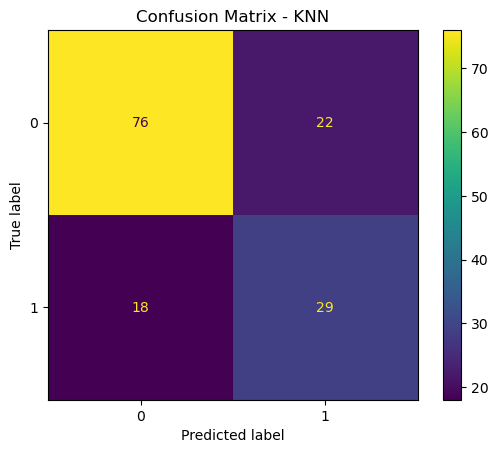

In [32]:
# Hiển thị ma trận nhầm lẫn (Confusion Matrix)
cm_rf = confusion_matrix(y_test, y_pred_knn, labels=KNN_Diabetes.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=KNN_Diabetes.classes_)
disp_rf.plot()
plt.title('Confusion Matrix - KNN')
plt.show()

In [33]:
# K-Fold Cross-Validation
kfold_scores_knn = cross_val_score(KNN_Diabetes, X, y, cv=10)
print(f'K-Fold Cross-Validation (KNN): {kfold_scores_knn}')
print(f'Độ chính xác trung bình K-Fold (KNN): {kfold_scores_knn.mean():.4f}')

K-Fold Cross-Validation (KNN): [0.64383562 0.73972603 0.71232877 0.68055556 0.69444444 0.76388889
 0.625      0.77777778 0.75       0.73611111]
Độ chính xác trung bình K-Fold (KNN): 0.7124


#### Nhận xét:

### 3.2  Sử dụng thuật toán Decision Tree để phân lớp và xây dựng mô hình

#### Sử dụng thuật toán Decision Tree để phân lớp

In [34]:
#Gọi thư viên thuật toán DecisionTree
from sklearn.tree import DecisionTreeClassifier

#Khai báo mô hình: - Sử dụng các tham sô mặc định của mô hình 
Tree_Diabetes= DecisionTreeClassifier()


#Kích thước của mô hình Deci
Tree_Diabetes.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

#### Huấn luyện mô hình:

In [35]:
# Huấn luyện mô hình với dữ liệu huấn luyện:
Tree_Diabetes.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
#Đánh giá độ chính xác trên tập Huấn luyện:
acc_train = Tree_Diabetes.score(X_train, y_train)
print('Độ chính xác của mô hình trên tập huấn luyện:', acc_train)

Độ chính xác của mô hình trên tập huấn luyện: 1.0


##### Hiển thị cây quyết định

Trực quan hóa cây quyết định thu được từ model đã huấn luyện trên tập Train

In [37]:
# Tên các thuộc tính đặc trưng (features) cho bài toán bệnh tiểu đường
feature_names = ['Gender','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']

# Tên các lớp (target names) cho bài toán bệnh tiểu đường
target_names = ['0: No Diabetes', '1: Diabetes']

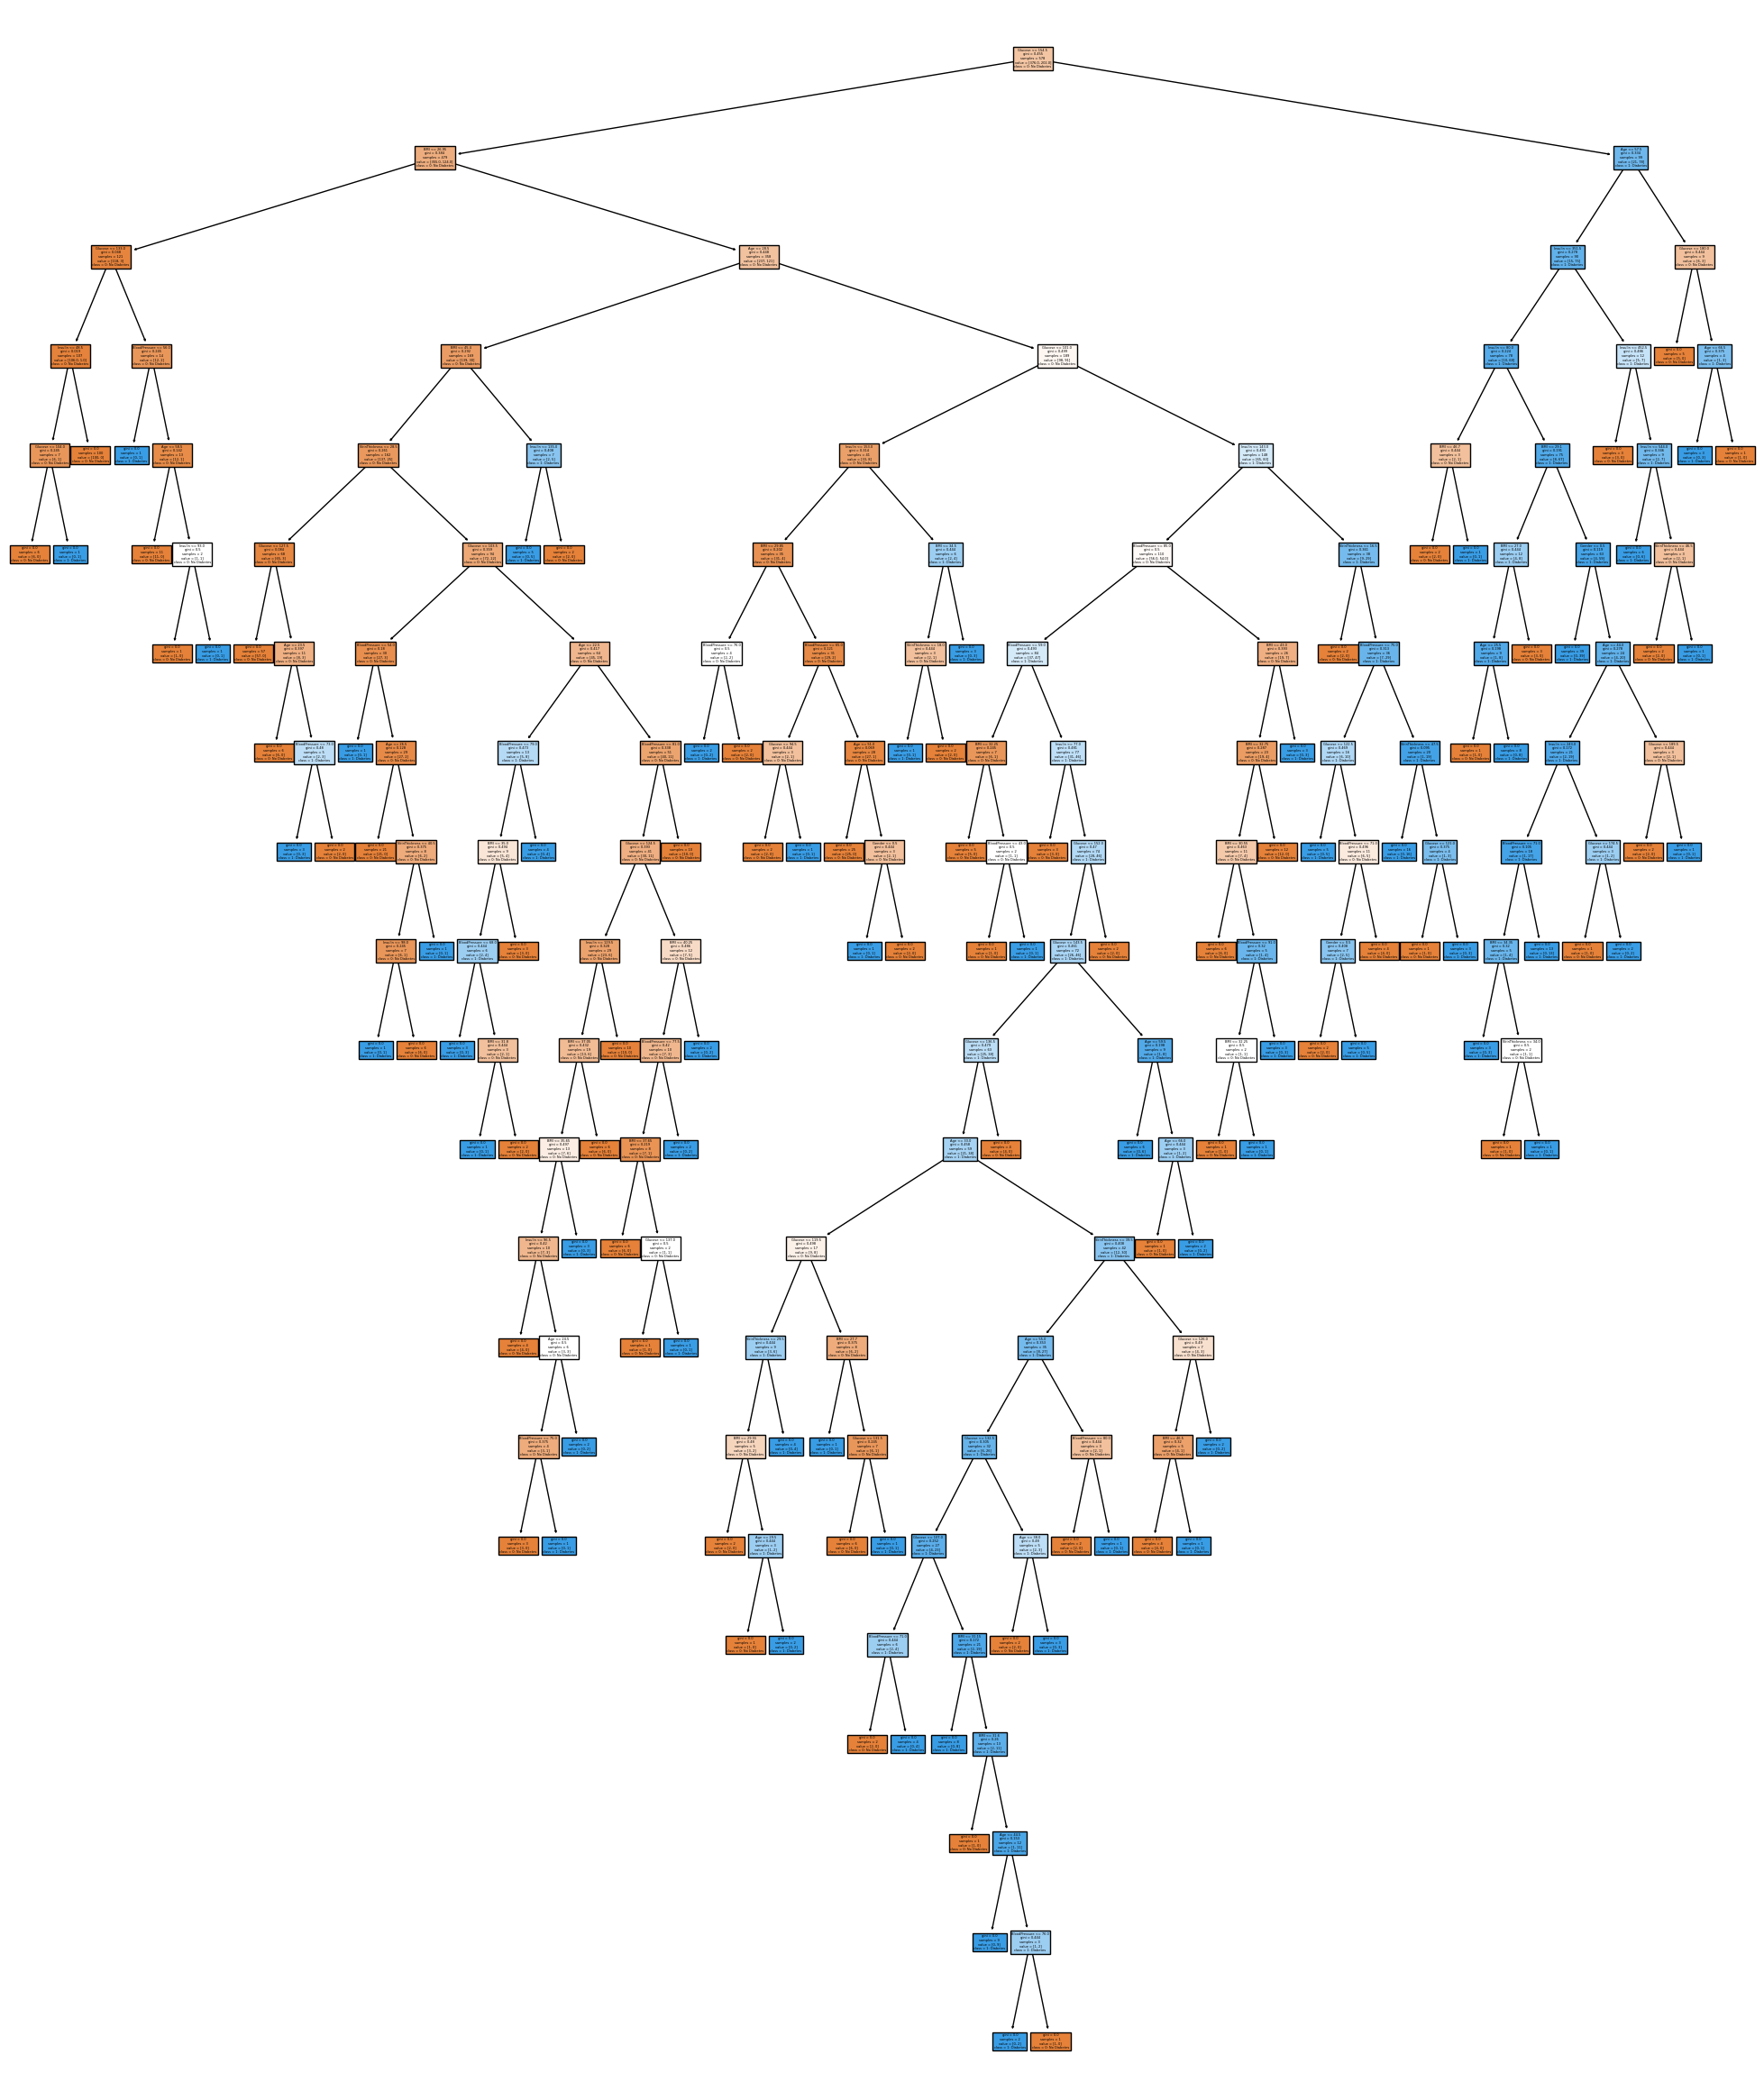

In [38]:
fig = plt.figure(figsize=(25,30))

#Hiển thị cây quyết định
tree.plot_tree(Tree_Diabetes, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)
plt.show()

['Gender', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
[0.01908557 0.31760302 0.12930875 0.05186035 0.10015824 0.21754037
 0.1644437 ]


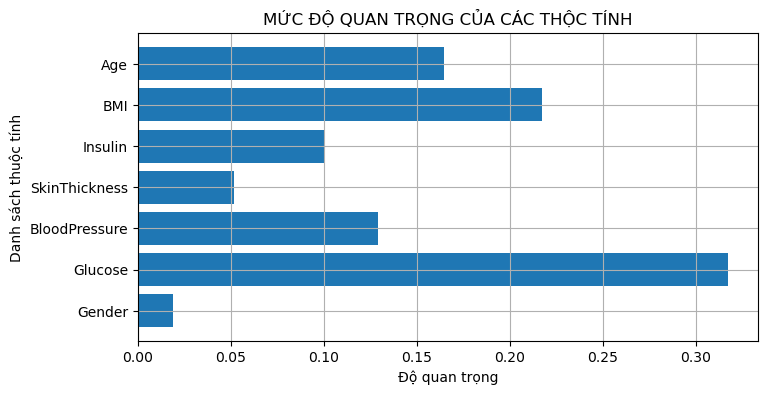

In [39]:
#Xác định mực độ quan trọng của các thuộc tính độc lập:
print(feature_names)
print(Tree_Diabetes.feature_importances_)

#Trực quan hóa
plt.figure(figsize=(8,4))
plt.barh(feature_names,Tree_Diabetes.feature_importances_)

plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THỘC TÍNH')
plt.ylabel('Danh sách thuộc tính')
plt.xlabel('Độ quan trọng')
plt.grid(True)
plt.show()

In [40]:
#Xác định độ sâu của cây: Khoảng cách tối đa giữa gốc và lá
print('Độ sâu của cây quyết định:',
      Tree_Diabetes.get_depth())

#Xác định số lượng nút lá của cây quyết định:
print('Số nút lá của cây quyết định:',
      Tree_Diabetes.get_n_leaves())

Độ sâu của cây quyết định: 20
Số nút lá của cây quyết định: 111


##### Đánh giá model trên tập kiểm thử:
---
Sử dụng model dự đoán trên tập Test và đánh giá độ chính xác

In [41]:
#Tập test gồm:
X_test

,Gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
336,0,196,76,36.0,249.0,36.5,29
517,1,114,88,29.0,126.0,27.8,66
598,0,97,76,32.0,91.0,40.9,32
33,0,138,76,29.0,126.0,33.2,35
439,1,97,64,36.0,100.0,36.8,25
...,...,...,...,...,...,...,...
382,1,115,72,29.0,126.0,28.9,46
328,1,92,80,29.0,126.0,42.2,29
568,0,92,62,25.0,41.0,19.5,25
429,0,86,68,28.0,71.0,30.2,24


In [42]:
# Phân loại bệnh tiểu đường trên tập kiểm thử
y_pred_dt = Tree_Diabetes.predict(X_test)

print("Kết quả phân loại bệnh tiểu đường trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred_dt)
print("Ground truth    : ", y_test)

Kết quả phân loại bệnh tiểu đường trên tập dữ liệu TEST:
Predicted labels:  [1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0
 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0]
Ground truth    :  336    1
517    0
598    1
33     0
439    0
      ..
382    1
328    0
568    0
429    0
136    0
Name: Outcome, Length: 145, dtype: int64


In [43]:
#Đánh giá độ chính xác trên tập Test:
from sklearn.metrics import accuracy_score
acc_num = accuracy_score(y_test, y_pred_dt, normalize=False)
acc = accuracy_score(y_test, y_pred_dt, normalize=True)

print("1.Tổng số mẫu dự đoán đúng:",acc_num, '/', len(y_test))
print("2.Độ chính xác đạt của model trên tập Test:", round(acc*100,2))

1.Tổng số mẫu dự đoán đúng: 100.0 / 145
2.Độ chính xác đạt của model trên tập Test: 68.97


In [44]:
# Các chỉ số khác:
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"Precision (Decision Tree): {precision_dt:.4f}")
print(f"Recall (Decision Tree): {recall_dt:.4f}")
print(f"F1-Score (Decision Tree): {f1_dt:.4f}")

Precision (Decision Tree): 0.5208
Recall (Decision Tree): 0.5319
F1-Score (Decision Tree): 0.5263


In [45]:
# Tính AUC-ROC
y_pred_prob_dt = Tree_Diabetes.predict_proba(X_test)[:, 1]
auc_roc_dt = roc_auc_score(y_test, y_pred_prob_dt)
print(f"AUC-ROC (Decision Tree): {auc_roc_dt:.4f}")

AUC-ROC (Decision Tree): 0.6486


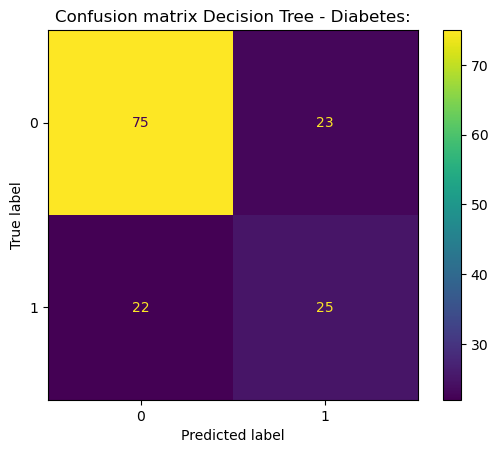

In [46]:
#Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_matrix_titanic = confusion_matrix(y_test,y_pred_dt)

#Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
plt.title('Confusion matrix Decision Tree - Diabetes:')
plt.show()

In [47]:
# K-Fold Cross-Validation
kfold_scores_dt = cross_val_score(Tree_Diabetes, X, y, cv=10)
print(f"K-Fold Cross-Validation (Decision Tree): {kfold_scores_dt}")
print(f"Độ chính xác trung bình K-Fold (Decision Tree): {kfold_scores_dt.mean():.4f}")

K-Fold Cross-Validation (Decision Tree): [0.64383562 0.7260274  0.5890411  0.59722222 0.75       0.76388889
 0.75       0.80555556 0.72222222 0.65277778]
Độ chính xác trung bình K-Fold (Decision Tree): 0.7001


#### Nhận xét:

### 3.3  Random Forest Classifier
--- 
Sử dụng thuật toán và huấn luyện mô hình

#### Sử dụng thuật toán để phân lớp

In [48]:
# Import thư viện
from sklearn.ensemble import RandomForestClassifier

# Khai báo mô hình Random Forest
RF_Diabetes = RandomForestClassifier()

#Kích thước của mô hình RF
RF_Diabetes.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Huấn luyện mô hình :

In [49]:
# Huấn luyện mô hình trên tập huấn luyện
RF_Diabetes.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
# Dự đoán trên tập kiểm thử
y_pred_rf = RF_Diabetes.predict(X_test)

['Gender', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
[0.02277375 0.27591942 0.10857643 0.09227082 0.1216747  0.21143254
 0.16735235]


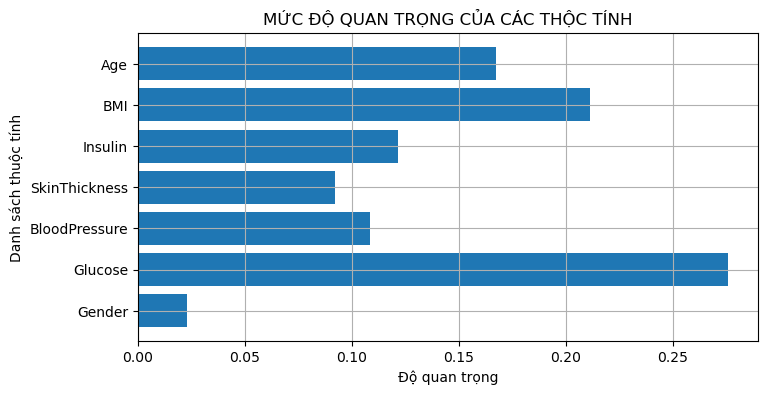

In [51]:
#Xác định mực độ quan trọng của các thuộc tính độc lập:
print(feature_names)
print(RF_Diabetes.feature_importances_)

#Trực quan hóa
plt.figure(figsize=(8,4))
plt.barh(feature_names,RF_Diabetes.feature_importances_)

plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THỘC TÍNH')
plt.ylabel('Danh sách thuộc tính')
plt.xlabel('Độ quan trọng')
plt.grid(True)
plt.show()

In [52]:
# Đánh giá độ chính xác trên tập huấn luyện
acc_train = RF_Diabetes.score(X_train, y_train)
print('Độ chính xác của mô hình trên tập huấn luyện:', round(acc_train * 100, 2), '%')

# Đánh giá độ chính xác trên tập kiểm thử
acc_test = Tree_Diabetes.score(X_test, y_test)
print('Độ chính xác của mô hình trên tập kiểm thử:', round(acc_test * 100, 2), '%')

Độ chính xác của mô hình trên tập huấn luyện: 100.0 %
Độ chính xác của mô hình trên tập kiểm thử: 68.97 %


In [53]:
# Các chỉ số khác:
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Precision (Random Forest): {precision_rf:.4f}")
print(f"Recall (Random Forest): {recall_rf:.4f}")
print(f"F1-Score (Random Forest): {f1_rf:.4f}")

Precision (Random Forest): 0.6222
Recall (Random Forest): 0.5957
F1-Score (Random Forest): 0.6087


In [54]:
# Tính AUC-ROC
y_pred_prob_rf = RF_Diabetes.predict_proba(X_test)[:, 1]
auc_roc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f"AUC-ROC (Random Forest): {auc_roc_rf:.4f}")

AUC-ROC (Random Forest): 0.8125


In [55]:
# Hiển thị một số kết quả dự đoán và giá trị thực tế
print("\nKết quả dự đoán của mô hình trên tập kiểm thử:")
print("Dự đoán    :", y_pred_rf[:20])
print("Giá trị thật:", y_test[:20])


Kết quả dự đoán của mô hình trên tập kiểm thử:
Dự đoán    : [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
Giá trị thật: 336    1
517    0
598    1
33     0
439    0
434    0
65     1
109    0
254    1
486    0
360    0
72     0
395    1
63     0
626    1
398    0
425    0
424    1
192    0
709    1
Name: Outcome, dtype: int64


In [56]:
# Kiểm tra số mẫu đúng và sai
from sklearn.metrics import accuracy_score

acc_num = accuracy_score(y_test, y_pred_rf, normalize=False)
total_samples = len(y_test)
wrong_predictions = total_samples - acc_num 

print("\nTổng số mẫu dự đoán đúng:", acc_num, '/', total_samples)
print("Tổng số mẫu dự đoán sai :", wrong_predictions, '/', total_samples)


Tổng số mẫu dự đoán đúng: 109.0 / 145
Tổng số mẫu dự đoán sai : 36.0 / 145


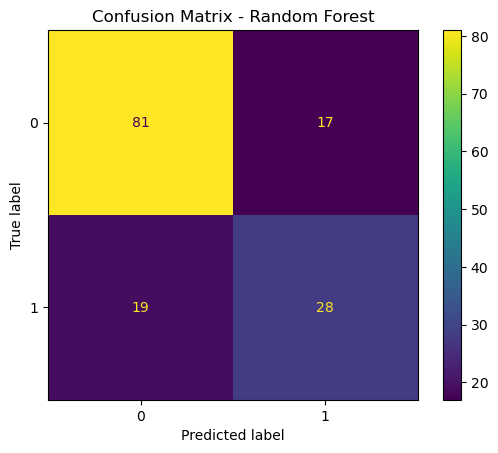

In [57]:
# Hiển thị ma trận nhầm lẫn
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=RF_Diabetes.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=RF_Diabetes.classes_)
disp_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [58]:
# K-Fold Cross-Validation
kfold_scores_rf = cross_val_score(RF_Diabetes, X, y, cv=10)
print(f"K-Fold Cross-Validation (Random Forest): {kfold_scores_rf}")
print(f"Độ chính xác trung bình K-Fold (Random Forest): {kfold_scores_rf.mean():.4f}")

K-Fold Cross-Validation (Random Forest): [0.71232877 0.76712329 0.65753425 0.72222222 0.70833333 0.79166667
 0.80555556 0.80555556 0.73611111 0.76388889]
Độ chính xác trung bình K-Fold (Random Forest): 0.7470


##### Nhận xét: 

### 3.4 Sử dụng thuật toán LogisticRegression để phân lớp và huấn luyện mô hình

#### Sử dụng thuật toán LogisticRegression để phân lớp

In [59]:
from sklearn.linear_model import LogisticRegression

# Khai báo mô hình Logistic Regression
LR_Diabetes = LogisticRegression()

# Kích thước của mô hình Logistic Regression
LR_Diabetes.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### Huấn luyện mô hình: 

In [60]:
# Huấn luyện mô hình trên tập huấn luyện
LR_Diabetes.fit(X_train, y_train)

LogisticRegression()

In [61]:
# Dự đoán trên tập kiểm tra
y_pred_lr = LR_Diabetes.predict(X_test)

# Đánh giá độ chính xác của mô hình: 
acc_train = LR_Diabetes.score(X_train, y_train)
acc_test = LR_Diabetes.score(X_test, y_test)
print("Độ chính xác trên tập huấn luyện:", round(acc_train * 100, 2), "%")
print("Độ chính xác trên tập kiểm tra:", round(acc_test * 100, 2), "%")

Độ chính xác trên tập huấn luyện: 78.2 %
Độ chính xác trên tập kiểm tra: 75.17 %


In [62]:
# Các chỉ số khác:
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Precision (Logistic Regression): {precision_lr:.4f}")
print(f"Recall (Logistic Regression): {recall_lr:.4f}")
print(f"F1-Score (Logistic Regression): {f1_lr:.4f}")

Precision (Logistic Regression): 0.6667
Recall (Logistic Regression): 0.4681
F1-Score (Logistic Regression): 0.5500


In [63]:
# Tính AUC-ROC
y_pred_prob_lr = LR_Diabetes.predict_proba(X_test)[:, 1]
auc_roc_lr = roc_auc_score(y_test, y_pred_prob_lr)
print(f"AUC-ROC (Logistic Regression): {auc_roc_lr:.4f}")

AUC-ROC (Logistic Regression): 0.8148


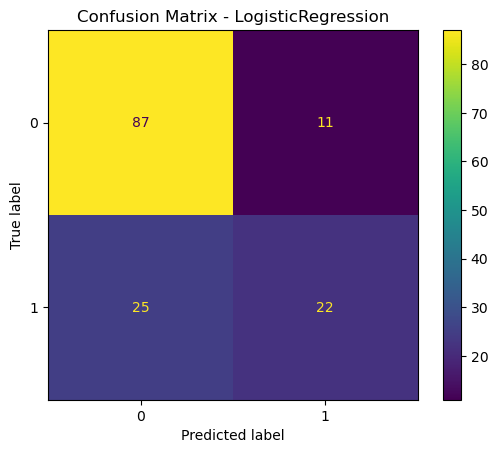

In [64]:
# Hiển thị ma trận nhầm lẫn (Confusion Matrix)
cm_rf = confusion_matrix(y_test, y_pred_lr, labels=LR_Diabetes.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=LR_Diabetes.classes_)
disp_rf.plot()
plt.title('Confusion Matrix - LogisticRegression')
plt.show()

In [65]:
#K-Fold Cross-Validation
kfold_scores_lr = cross_val_score(RF_Diabetes, X, y, cv=10)
print(f'K-Fold Cross-Validation (Logistic Regression): {kfold_scores_lr}')
print(f'Độ chính xác trung bình K-Fold (Logistic Regression): {kfold_scores_rf.mean():.4f}')

K-Fold Cross-Validation (Logistic Regression): [0.71232877 0.76712329 0.64383562 0.70833333 0.70833333 0.76388889
 0.79166667 0.77777778 0.72222222 0.77777778]
Độ chính xác trung bình K-Fold (Logistic Regression): 0.7470


##### Nhận xét: 

### 3.5 Support Vector Machine (SVM)
---
Sử dụng thuật toán SVM để phân lớp và huân luyện mô hình

#### Thuận toán SVM phân lớp:

In [66]:
# Import thư viện
from sklearn.svm import SVC

# Khai báo mô hình SVM
SVM_Diabetes = SVC(probability=True, random_state=42)
#  Kích thước của mô hình SVM
SVM_Diabetes.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### Huấn luyện mô hình: 

In [67]:
# Huấn luyện mô hình trên tập huấn luyện
SVM_Diabetes.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [68]:
# Dự đoán trên tập kiểm tra
y_pred_svm = SVM_Diabetes.predict(X_test)

# Đánh giá độ chính xác của mô hình: 
acc_train = SVM_Diabetes.score(X_train, y_train)
acc_test = SVM_Diabetes.score(X_test, y_test)
print("Độ chính xác trên tập huấn luyện:", round(acc_train * 100, 2), "%")
print("Độ chính xác trên tập kiểm tra:", round(acc_test * 100, 2), "%")

Độ chính xác trên tập huấn luyện: 77.16 %
Độ chính xác trên tập kiểm tra: 76.55 %


In [69]:
# Các chỉ số khác:
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"Precision (SVM): {precision_svm:.4f}")
print(f"Recall (SVM): {recall_svm:.4f}")
print(f"F1-Score (SVM): {f1_svm:.4f}")

Precision (SVM): 0.7241
Recall (SVM): 0.4468
F1-Score (SVM): 0.5526


In [70]:
# Tính AUC-ROC
y_pred_prob_svm = SVM_Diabetes.predict_proba(X_test)[:, 1]
auc_roc_svm = roc_auc_score(y_test, y_pred_prob_svm)
print(f"AUC-ROC (SVM): {auc_roc_svm:.4f}")

AUC-ROC (SVM): 0.7996


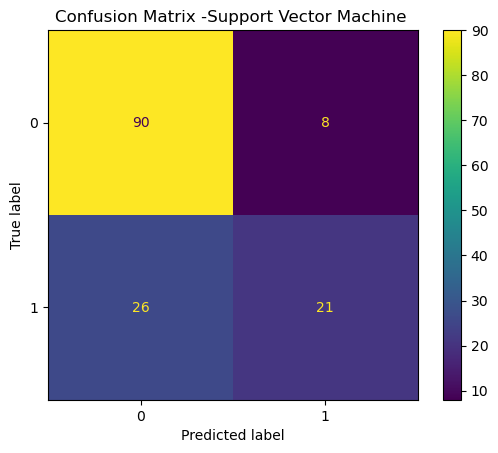

In [71]:
# Hiển thị ma trận nhầm lẫn (Confusion Matrix)
cm_rf = confusion_matrix(y_test, y_pred_svm, labels=SVM_Diabetes.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=SVM_Diabetes.classes_)
disp_rf.plot()
plt.title('Confusion Matrix -Support Vector Machine ')
plt.show()

In [72]:
# K-Fold Cross-Validation
kfold_scores_svm = cross_val_score(SVM_Diabetes, X, y, cv=10)
print(f"K-Fold Cross-Validation (SVM): {kfold_scores_svm}")
print(f"Độ chính xác trung bình K-Fold (SVM): {kfold_scores_svm.mean():.4f}")

K-Fold Cross-Validation (SVM): [0.79452055 0.73972603 0.7260274  0.70833333 0.70833333 0.79166667
 0.73611111 0.77777778 0.80555556 0.79166667]
Độ chính xác trung bình K-Fold (SVM): 0.7580


##### Nhận xét: 

### 3.6 Gradient Boosting
---
Sử dụng thuật toán và huấn luyện mô hình

#### Sử dụng thuật toán GradientBoosting để phân lớp

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

# Khởi tạo mô hình Gradient Boosting
GB_Diabetes = GradientBoostingClassifier()

# Kích thước của mô hình Logistic Regression
GB_Diabetes.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### Huấn luyện mô hình:

In [74]:
# Huấn luyện mô hình trên tập huấn luyện
GB_Diabetes.fit(X_train, y_train)

GradientBoostingClassifier()

In [75]:
# Dự đoán trên tập kiểm tra
y_pred_gb = GB_Diabetes.predict(X_test)

# Đánh giá độ chính xác của mô hình: 
acc_train = GB_Diabetes.score(X_train, y_train)
acc_test = GB_Diabetes.score(X_test, y_test)
print("Độ chính xác trên tập huấn luyện:", round(acc_train * 100, 2), "%")
print("Độ chính xác trên tập kiểm tra:", round(acc_test * 100, 2), "%")

Độ chính xác trên tập huấn luyện: 91.7 %
Độ chính xác trên tập kiểm tra: 77.24 %


In [76]:
# Các chỉ số khác:
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_svm = f1_score(y_test, y_pred_gb)

print(f"Precision (Gradient Boosting): {precision_svm:.4f}")
print(f"Recall (Gradient Boosting): {recall_svm:.4f}")
print(f"F1-Score (Gradient Boosting): {f1_svm:.4f}")

Precision (Gradient Boosting): 0.7241
Recall (Gradient Boosting): 0.4468
F1-Score (Gradient Boosting): 0.6292


In [77]:
# Tính AUC-ROC
y_pred_prob_gb = GB_Diabetes.predict_proba(X_test)[:, 1]
auc_roc_svm = roc_auc_score(y_test, y_pred_prob_gb)
print(f"AUC-ROC (Gradient Boosting): {auc_roc_svm:.4f}")

AUC-ROC (Gradient Boosting): 0.8189


['Gender', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
[0.00455993 0.40545379 0.06395075 0.03526548 0.10490421 0.21823598
 0.16762986]


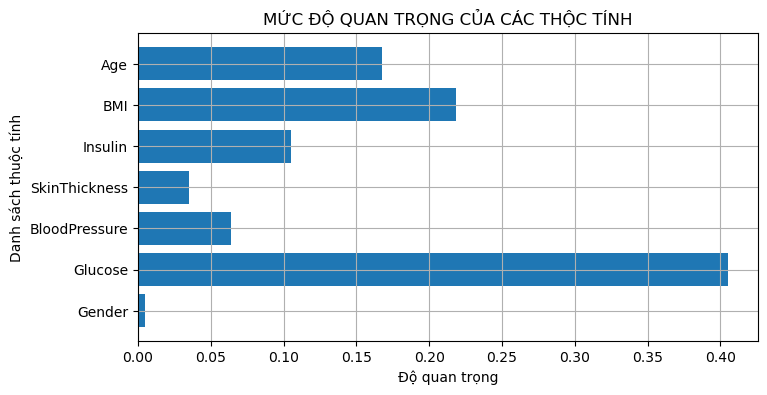

In [78]:
#Xác định mực độ quan trọng của các thuộc tính độc lập:
print(feature_names)
print(GB_Diabetes.feature_importances_)

#Trực quan hóa
plt.figure(figsize=(8,4))
plt.barh(feature_names,GB_Diabetes.feature_importances_)

plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THỘC TÍNH')
plt.ylabel('Danh sách thuộc tính')
plt.xlabel('Độ quan trọng')
plt.grid(True)
plt.show()

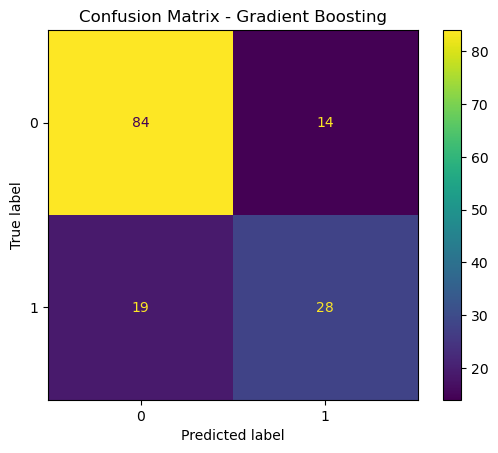

In [79]:
# Hiển thị ma trận nhầm lẫn (Confusion Matrix)
cm_rf = confusion_matrix(y_test, y_pred_gb, labels=GB_Diabetes.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=GB_Diabetes.classes_)
disp_rf.plot()
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

In [80]:
# K-Fold Cross-Validation
kfold_scores_gb = cross_val_score(GB_Diabetes, X, y, cv=10)
print(f"K-Fold Cross-Validation (Gradient Boosting): {kfold_scores_svm}")
print(f"Độ chính xác trung bình K-Fold (Gradient Boosting): {kfold_scores_svm.mean():.4f}")

K-Fold Cross-Validation (Gradient Boosting): [0.79452055 0.73972603 0.7260274  0.70833333 0.70833333 0.79166667
 0.73611111 0.77777778 0.80555556 0.79166667]
Độ chính xác trung bình K-Fold (Gradient Boosting): 0.7580


##### Nhận xét: 

### 3.7 Neural Networks (MLP)
---
Sử dụng thuật toán để phân lớp và huấn luyện mô hình

#### Sử dụng thuật toán Neural Networks (MLP) để phân lớp 

In [81]:
from sklearn.neural_network import MLPClassifier

# Khởi tạo mô hình MLP (Neural Network)
MLP_Diabetes = MLPClassifier()

# Kích thước của mô hình MLP
MLP_Diabetes.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

#### Huấn luyện mô hình :

In [82]:
# Huấn luyện mô hình trên tập huấn luyện
MLP_Diabetes.fit(X_train, y_train)

MLPClassifier()

In [83]:
# Dự đoán trên tập kiểm tra
y_pred_mlp = MLP_Diabetes.predict(X_test)

# Đánh giá độ chính xác của mô hình: 
acc_train = MLP_Diabetes.score(X_train, y_train)
acc_test = MLP_Diabetes.score(X_test, y_test)
print("Độ chính xác trên tập huấn luyện:", round(acc_train * 100, 2), "%")
print("Độ chính xác trên tập kiểm tra:", round(acc_test * 100, 2), "%")

Độ chính xác trên tập huấn luyện: 73.88 %
Độ chính xác trên tập kiểm tra: 72.41 %


In [84]:
# Các chỉ số khác:
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)

print(f"Precision (MLP): {precision_mlp:.4f}")
print(f"Recall (MLP): {recall_mlp:.4f}")
print(f"F1-Score (MLP): {f1_mlp:.4f}")

Precision (MLP): 0.6207
Recall (MLP): 0.3830
F1-Score (MLP): 0.4737


In [85]:
# Tính AUC-ROC
y_pred_prob_mlp = MLP_Diabetes.predict_proba(X_test)[:, 1]
auc_roc_mlp = roc_auc_score(y_test, y_pred_prob_mlp)
print(f"AUC-ROC (MLP): {auc_roc_mlp:.4f}")

AUC-ROC (MLP): 0.7130


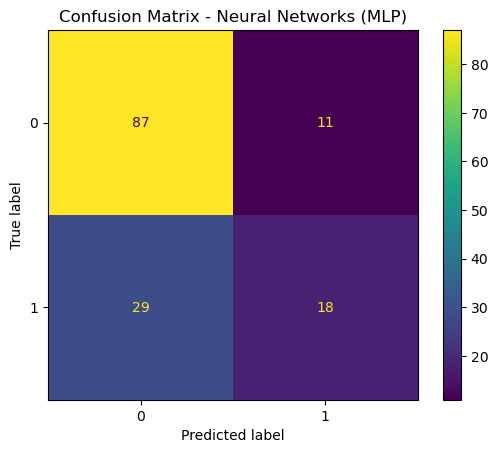

In [86]:
# Hiển thị ma trận nhầm lẫn (Confusion Matrix)
cm_rf = confusion_matrix(y_test, y_pred_mlp, labels=MLP_Diabetes.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=MLP_Diabetes.classes_)
disp_rf.plot()
plt.title('Confusion Matrix - Neural Networks (MLP)')
plt.show()

In [87]:
# K-Fold Cross-Validation
kfold_scores_mlp = cross_val_score(MLP_Diabetes, X, y, cv=10)
print(f"K-Fold Cross-Validation (MLP): {kfold_scores_mlp}")
print(f"Độ chính xác trung bình K-Fold (MLP): {kfold_scores_mlp.mean():.4f}")

K-Fold Cross-Validation (MLP): [0.7260274  0.71232877 0.65753425 0.72222222 0.72222222 0.73611111
 0.61111111 0.68055556 0.70833333 0.75      ]
Độ chính xác trung bình K-Fold (MLP): 0.7026


##### Nhận xét:


### 3.8 XGBoost
---
Sử dụng thuật toán để phân lớp và huấn luyện mô hình 

#### Sử dụng thuật toán XGBoost để phân lớp


In [88]:
from xgboost import XGBClassifier

# Khởi tạo mô hình XGBoost
XGB_Diabetes = XGBClassifier()

# Kích thước của mô hình MLP
XGB_Diabetes.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

#### Huấn luyện mô hình: 

In [89]:
# Huấn luyện mô hình trên tập huấn luyện
XGB_Diabetes.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [90]:
# Dự đoán trên tập kiểm tra
y_pred_xgb = XGB_Diabetes.predict(X_test)

# Đánh giá độ chính xác của mô hình: 
acc_train = XGB_Diabetes.score(X_train, y_train)
acc_test = XGB_Diabetes.score(X_test, y_test)
print("Độ chính xác trên tập huấn luyện:", round(acc_train * 100, 2), "%")
print("Độ chính xác trên tập kiểm tra:", round(acc_test * 100, 2), "%")

Độ chính xác trên tập huấn luyện: 100.0 %
Độ chính xác trên tập kiểm tra: 73.1 %


In [91]:
# Các chỉ số khác:
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"Precision (XGB): {precision_mlp:.4f}")
print(f"Recall (XGB): {recall_mlp:.4f}")
print(f"F1-Score (XGB): {f1_mlp:.4f}")

Precision (XGB): 0.6207
Recall (XGB): 0.3830
F1-Score (XGB): 0.4737


In [92]:
# Tính AUC-ROC
y_pred_prob_xgb = XGB_Diabetes.predict_proba(X_test)[:, 1]
auc_roc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
print(f"AUC-ROC (XGB): {auc_roc_mlp:.4f}")

AUC-ROC (XGB): 0.7130


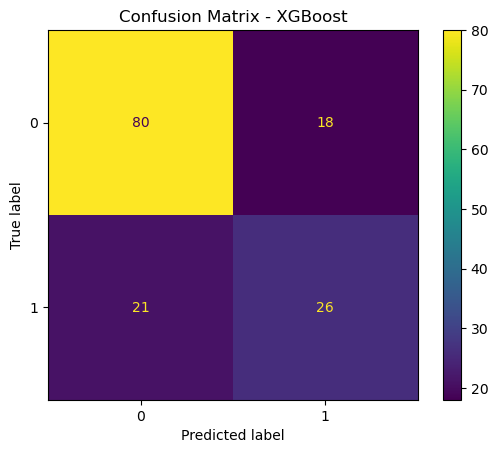

In [93]:
# Hiển thị ma trận nhầm lẫn (Confusion Matrix)
cm_rf = confusion_matrix(y_test, y_pred_xgb, labels=XGB_Diabetes.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=XGB_Diabetes.classes_)
disp_rf.plot()
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [94]:
# K-Fold Cross-Validation
kfold_scores_xgb = cross_val_score(XGB_Diabetes, X, y, cv=10)
print(f"K-Fold Cross-Validation (XGB): {kfold_scores_xgb}")
print(f"Độ chính xác trung bình K-Fold (XGB): {kfold_scores_xgb.mean():.4f}")

K-Fold Cross-Validation (XGB): [0.69863014 0.67123288 0.60273973 0.73611111 0.70833333 0.80555556
 0.75       0.72222222 0.70833333 0.76388889]
Độ chính xác trung bình K-Fold (XGB): 0.7167


##### Nhận xét: 

### 4. So sánh các mô hình với nhau

In [95]:
# Khởi tạo các mô hình
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True, random_state=42)  
}
# Huấn luyện lại các mô hình
for name, model in models.items():
    model.fit(X_train, y_train)

In [96]:
# So sánh các mô hình theo các chỉ số: Accuracy, Precision, Recall, F1, AUC
model_results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Tính AUC nếu model có predict_proba
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, y_proba)
    else:
        auc_score = None

    model_results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "AUC": auc_score
    })

results_df = pd.DataFrame(model_results)
results_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Gradient Boosting,0.779310,0.666667,0.638298,0.652174,0.817846
1,Random Forest,0.737931,0.595745,0.595745,0.595745,0.792662
2,KNN,0.724138,0.568627,0.617021,0.591837,0.740122
3,Naive Bayes,0.751724,0.641026,0.531915,0.581395,0.787234
4,SVM,0.765517,0.724138,0.446809,0.552632,0.799609
5,Logistic Regression,0.751724,0.666667,0.468085,0.550000,0.814807
6,Decision Tree,0.682759,0.510638,0.510638,0.510638,0.637972


In [97]:
# Lấy mô hình tốt nhất theo F1 Score
best_model_name = results_df.sort_values(by="F1 Score", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

print(f" Mô hình tốt nhất hiện tại theo F1 Score: {best_model_name}")

 Mô hình tốt nhất hiện tại theo F1 Score: Gradient Boosting


In [98]:
# Định nghĩa mô hình ban đầu
best_model = GradientBoostingClassifier()
best_model_name = 'GradientBoosting'
models = {}

# Thiết lập lưới tham số cho Gradient Boosting
param_grid = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5]
}

print('Đang tìm kiếm tham số tốt nhất với GridSearchCV...')
grid = GridSearchCV(best_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

# Kết quả tốt nhất
print('Tham số tốt nhất:', grid.best_params_)

# Cập nhật lại mô hình tốt nhất
best_model = grid.best_estimator_
models[best_model_name] = best_model

Đang tìm kiếm tham số tốt nhất với GridSearchCV...
Tham số tốt nhất: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}


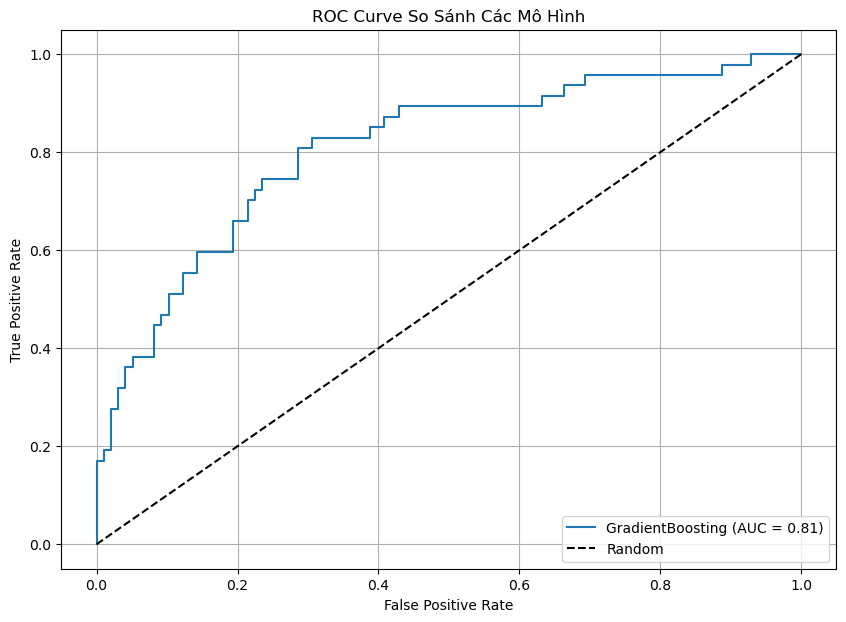

In [99]:
# Hiển thị lưới 
plt.figure(figsize=(10, 7))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve So Sánh Các Mô Hình")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

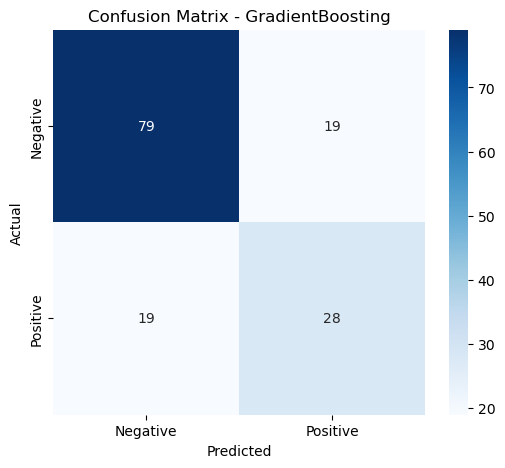

\ Classification Report - GradientBoosting:

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        98
           1       0.60      0.60      0.60        47

    accuracy                           0.74       145
   macro avg       0.70      0.70      0.70       145
weighted avg       0.74      0.74      0.74       145



In [100]:
# Dự đoán trên tập test
y_pred_best = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

# Classification Report
print(f"\ Classification Report - {best_model_name}:\n")
print(classification_report(y_test, y_pred_best))

In [101]:
# Thêm cột dự đoán vào DataFrame
df_test = X_test.copy()
df_test["Actual"] = y_test
df_test["Predicted"] = y_pred_best

# Lọc ra các mẫu bị dự đoán sai
df_misclassified = df_test[df_test['Actual'] != df_test['Predicted']]

# In ra 10 mẫu đầu tiên bị dự đoán sai
print('10 Mẫu bị dự đoán sai:')
print(df_misclassified.head(10))

10 Mẫu bị dự đoán sai:
     Gender  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age  \
598       0       97             76           32.0     91.0  40.9   32   
33        0      138             76           29.0    126.0  33.2   35   
65        1      100             66           20.0     90.0  32.9   28   
254       1      101             86           37.0    126.0  45.6   38   
395       0      129             64           29.0    115.0  26.4   28   
626       1      111             70           27.0    126.0  27.5   40   
424       1      134             70           29.0    126.0  28.9   23   
192       1      103             72           32.0    190.0  37.7   55   
101       1       95             85           25.0     36.0  37.4   24   
54        1      146             82           29.0    126.0  40.5   44   

     Actual  Predicted  
598       1          0  
33        0          1  
65        1          0  
254       1          0  
395       1          0  
626       1 

### 5. Chọn  ra mô hình tốt nhất

In [102]:
# Lưu mô hình và scaler
import joblib

joblib.dump(model, 'best_diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

#### .	Sử dụng model xây dựng được, dự đoán Bệnh nhân với các thông số như sau có bị mắc bệnh tiểu đường hay không?

•	Gender: 0 (nữ)

•	Glucose: 128

•	BloodPressure: 78

•	SkinThickness: 30

•	Insulin: 138

•	BMI: 30

•	Age: 23

In [103]:
# Các thông số đầu vào của bệnh nhân
new_data = np.array([[0, 128, 78, 30, 138, 30, 23]])

# Dự đoán bệnh tiểu đường với mô hình đã huấn luyện
prediction = GB_Diabetes.predict(new_data)

# In kết quả dự đoán
if prediction == 1:
    print("Bệnh nhân có khả năng mắc bệnh tiểu đường.")
else:
    print("Bệnh nhân không mắc bệnh tiểu đường.")

Bệnh nhân không mắc bệnh tiểu đường.


C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [104]:
# Các thông số đầu vào của bệnh nhân
new_data = np.array([[0, 148, 72, 35, 126, 33.6, 50]])

# Dự đoán bệnh tiểu đường với mô hình đã huấn luyện
prediction = GB_Diabetes.predict(new_data)

# In kết quả dự đoán
if prediction == 1:
    print("Bệnh nhân có khả năng mắc bệnh tiểu đường.")
else:
    print("Bệnh nhân không mắc bệnh tiểu đường.")

Bệnh nhân có khả năng mắc bệnh tiểu đường.


C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
